        -Sergio Muñoz González
        -Alicia Peñaranda Navazo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# The next line indicates to matplotlib to show the plots inline in the notebook
%matplotlib inline

# Programming assignment 


The objective of this assignment is to generate this translation table. To do so you will have to:

+ Read the genome of a species from a FASTA file
+ Read the annotation file for that genome to extract the location in the genome of the Coding Sequences (CDS) for each protein
+ Extract the mRNAs from the genome that codifies each protein using its location 
+ Read the proteins from a FASTA file
+ Generate the translation table using pairs of mRNA and protein


In the following you will find our functions for different formats file parsing. 

# File parsing 

Implement the function below to parse a fasta file. Find an example of a fasta format file here:
***
<pre>>NC_000907.1:1073118-1073456 Haemophilus influenzae Rd KW20 chromoso
ATGAAAACATTATTCACTTCGGTTGTATTGTGTGGTGCGCTGGTTGTTTCTTCGTCTTTTGCTGAGGAAA
AAGCGACAGANCAAACCGCTCAATCTGTTGTGACAACTCAAGCTGAAGCTCAAGTAGCACCAGCCGTAGT
GAGCGATAAATTGAATATCAACACAGCAACTGCCAGTGAAATTCAAAAATCCTTAACTGGCATTGGTGCG
AAAAAAGCGGAAGCTATTGTGCAATATCGTGAAAAACACGGTAATTTTKCTAATGCAGAACAGCTTTTAG
AAGTACAAGGAATTGGCAAAGCAACACTAGAGAAAAATCGTGATCGTATAATCTTTTAA
</pre>
***


In [5]:
def readFasta(file):#método rápido: la concatenación de strings se hace en una variable externa al diccionario y, posteriromente, se asigna a la clave específica del diccionario su secuencia correspondiente (todas las strings previamente concatenadas en la variable externa)
    """ Reads all sequences of a FASTA file 
        returns a dictionary """ 
    d = {}
    with open(file, 'r') as f:
        for line in f:
            if line[0] == '>' and d == {}:
                seq=''
                lista=line[1:].split()
                d[lista[0]] = seq
                identificador=lista[0]
            elif line[0] =='>' and d != {}:
                d[identificador]=seq
                seq=''
                lista=line[1:].split()
                d[lista[0]] = seq
                identificador=lista[0]
            else:
                seq += line[:-1].upper() 
        d[identificador]=seq
    return d

def readFasta2(file):#método lento: la concatenación de las strings se realiza directamente al valor de una clave, determinada en el diccionario(esto computacionalmente es mucho más lento)
    """ Reads all sequences of a FASTA file 
        returns a dictionary """ 
    d = {}
    with open(file, 'r') as f:
         for line in f:
            if line[0] == '>':
                seq=''
                lista=line[1:].split()
                d[lista[0]] = seq
                identificador=lista[0]
            else:
                d[identificador] += line[:-1].upper()
    return d


In [9]:
# Cell for checking if readFasta is working
seqs = readFasta('phix174/phix.fa')
#print(seqs['gi|216019|gb|J02482.1|PX1CG'])
# Check that the number of sequences is one
assert(len(seqs)==1)
# Check that the length of the sequences is correct
assert(len(seqs['gi|216019|gb|J02482.1|PX1CG'])==5386)

print("All tests Ok")

All tests Ok


In [12]:

def countBases(seq, bases = ['A','T','G','C']):
    """ Counts the number of occurrences of each base in the sequence seq
        There are two return values: the list of bases and the list of counts
    """
    counts=[]
    for base in bases:
        conteo=seq.count(base)
        counts.append(conteo)
    return bases, counts

countBases(seqs['gi|216019|gb|J02482.1|PX1CG'])

(['A', 'T', 'G', 'C'], [1291, 1684, 1254, 1157])

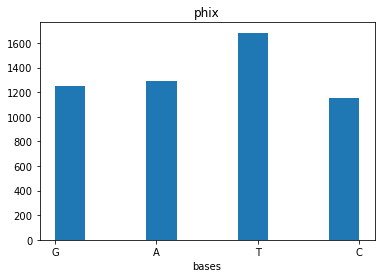

In [13]:
# Use matplotlib to show the histogram of bases for phiX174

x=list(seqs['gi|216019|gb|J02482.1|PX1CG'])
plt.title('phix')
plt.xlabel('bases')
_=plt.hist(x) #esto es para un histograma


(['A', 'T', 'G', 'C'], [1291, 1684, 1254, 1157])


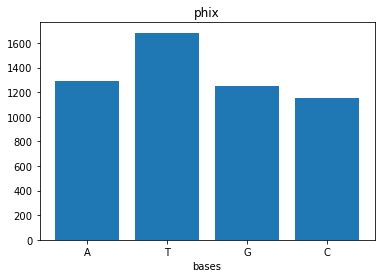

In [9]:
#En las siguientes líneas se encuentra el gráfico de barras con la función bar 
conteo=countBases(seqs['gi|216019|gb|J02482.1|PX1CG'])
print(conteo)
x=conteo[0]
y=conteo[1]
plt.title('phix')
plt.xlabel('bases')
_=plt.bar(x,y)

In [22]:
def GCContent(seq):
    """ Computes the percentage of GC content of a sequence. 
        Note that N should be ignored """
    gc=seq.count('G')+seq.count('C')
    total=0
    for n in seq:
        if n != 'N':
            total +=1
    porcentaje=(gc/total)
    return porcentaje


In [23]:
# Check that the GC content is correct
seqs = readFasta("phix174/phix.fa")
assert(GCContent(seqs['gi|216019|gb|J02482.1|PX1CG'])==0.44764203490531007)
# Check that the GC content is correct
seqs = readFasta("plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa")
assert(GCContent(seqs['NC_004325.1'])==0.20545724181242733)

print("All tests Ok")

All tests Ok


In [12]:
files = ["haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna",
         "phix174/phix.fa",
         "plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa",
         "arabidopsis_thaliana/GCF_000001735.3_TAIR10_genomic.fna",
         "homo_sapiens/homo_sapiens_chr21.fasta"]

gcs = []
for file in files:
    seqs = readFasta(file)
    %time readFasta(file)
    # Count only the first sequence
    keys = list(seqs.keys())
    gcs.append(GCContent(seqs[keys[0]])) 
    
print(gcs)

Wall time: 159 ms
Wall time: 496 µs
Wall time: 8.9 ms
Wall time: 3min 10s
Wall time: 2min 19s
[0.3814884716178203, 0.44764203490531007, 0.20545724181242733, 0.3587307677679867, 0.4093836151314954]


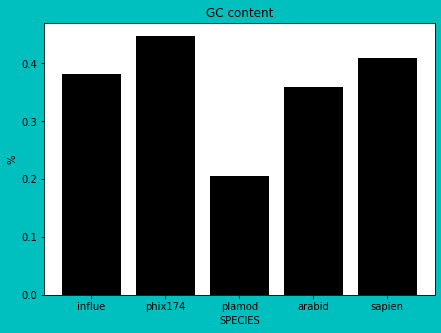

In [35]:
# Use matplotlib to show the GC content of the different species with a bar plot
plt.figure(num=None, figsize=(7, 5), facecolor='c',edgecolor='c')
x=['influe','phix174','plamod','arabid','sapien']
y=gcs
plt.title('GC content')
plt.xlabel('SPECIES')
plt.ylabel('%')
_=plt.bar(x,y,color='k')

In [24]:
def readFastq(file):
    """ Read a FASTQ format file """
    reads = []
    quals = []
    with open(file, 'r') as f:
        lines=f.readlines()
        reads=[read[:-1] for read in lines[1::4]]
        qualities=[qual[:-1] for qual in lines[3::4]]
        for line in qualities:
            q=[]
            for element in line:
                q.append(ord(element)-33)

            quals.append(q)
    return reads, quals
readFastq('phix174/SRR835775_1.first1000.fastq')

(['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
  'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
  'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
  'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
  'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC',
  'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC',
  'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG',
  'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA',
  'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG',
  'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGT

Wall time: 11.5 ms
[[[30 30 30 ...  2  2  2]
  [34 34 34 ...  2  2  2]
  [31 31 27 ... 23 23 32]
  ...
  [31 31 34 ...  2  2  2]
  [31 31 34 ... 34 35 34]
  [34 31 34 ... 29 32 35]]]


5.011872336272714e-10

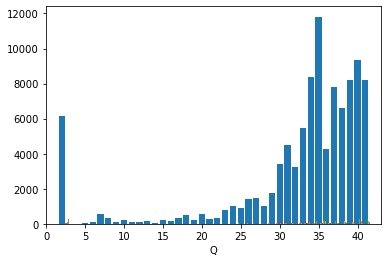

In [31]:
import math

# Use matplotlib to show the a histogram of Qs
%time rr, qq = readFastq('phix174/SRR835775_1.first1000.fastq')
#%time rr, qq = readFastq('sintetico/sample_01.fasta.fastq')
qq=np.array([qq])
print(qq)
q =np.concatenate(qq,axis=0)
plt.xlabel('Q')
plt.xlim((0,43))
hh, bb = np.histogram(q,range(1,50))
plt.bar(np.arange(1,49),hh)
h = plt.hist(q,range(50))
math.pow(10,-(ord('~')-33)/10)



### Spark exercise

In [15]:
import pyspark
sc = pyspark.SparkContext(appName='Test')
sc

<SparkContext master=local[*] appName=Test>

In [25]:
# Implement a sequence of spark transformations to read a fasta file 
#   and to compute the number of occurrences of each base. 
# 
# You can use count countBases inside a tranformation instead of a 
# lambda


#Sin utilizar funcion countBases
lines = sc.textFile('phix174/phix.fa',8)
bases =  (lines.filter(lambda line:line[0] != '>').flatMap(lambda line: list(line)).map(lambda base:(base,1)).reduceByKey(lambda base1,base2: base1 + base2))
print(bases.collect())



[('C', 1157), ('A', 1291), ('T', 1684), ('G', 1254)]


In [11]:
#Utilizando funcion countbases(fuera de una transformación)
lines2 = sc.textFile('phix174/phix.fa',8)
bases2= (lines2.filter(lambda line:line[0] != '>'))
seq=bases2.reduce(lambda line1,line2:line1+line2)
countBases(seq)

(['A', 'T', 'G', 'C'], [1291, 1684, 1254, 1157])

In [26]:
def complementary(gen):
    """ From a sequence of nucleotides return the inverse complementary
          e.g. GAACCT should return AGGTTC
          Hint: Use a dictionary for the translations
        """
    complementaria={'A':'T','C':'G','G':'C','T':'A'}
    HebraC=''
    for base in gen:
        HebraC= complementaria[base]+HebraC
    return HebraC
    

In [27]:
# Tests
assert(complementary('G')=='C')
assert(complementary('AT')=='AT')
assert(complementary('GC')=='GC')
assert(complementary('GATACA')=='TGTATC')
# If you added all possible combination of bases uncomment the 
# following line to check
# assert(complementary('GATACASWKMYRHDVBN')=='NVBHDYRKMWSTGTATC')

print('All tests OK!')

All tests OK!


In [28]:
def extractProteinId(attribs):
    """ Extract the protein_id from the complete string of the attributes 
        field of the gff """
    protein_id = attribs[attribs.find("protein_id=")+len("protein_id="):]
    i = protein_id.find(";")
    if i>=0:
        protein_id = protein_id[:i]
        
    return protein_id
    
    
def extractCDSFromGFF(gff_file):
    """ This function extract the regions information from a gff file for all CDSs.
        
        This function returns a dictionary with the protein_id being the keys and 
        the values in a list with the sequence_id and tuples with (start, end, strand, frame)
        
        Note that a CDS might spread over multiple lines. For each line you should include 
        one tuple.
        
        Check the tests in the next cell for reference
        
    """
    with open(gff_file,'r') as f:
        lineas=f.readlines()
        cdslines=[line[:-1] for line in lineas if (line[0] != '#') and 'CDS' in line]
        cdss={}
        for line in cdslines:
            elements=line.split()
            if extractProteinId(line) in cdss:
                cdss[extractProteinId(line)].append((int(elements[3]),int(elements[4]),elements[6],int(elements[7])))
            else:
                cdss[extractProteinId(line)]=[elements[0],(int(elements[3]),int(elements[4]),elements[6],int(elements[7]))]
            
    return cdss
            
extractCDSFromGFF('haemophilus_influenzae/test3.gff')  

{'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)],
 'NP_438271.2': ['NC_000907.1',
  (104277, 104318, '+', 0),
  (104318, 105274, '+', 0)]}

In [20]:
# Tests
assert(extractCDSFromGFF('haemophilus_influenzae/test1.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test2.gff')== {'NP_438174.1': ['NC_000907.1',  (2, 1021, '+', 0)],
                                                  'NP_438175.1': ['NC_000907.1',  (1190, 3013, '+', 0)],
                                                  'NP_438176.1': ['NC_000907.1', (3050, 3838, '-', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test3.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)],
                 'NP_438271.2': ['NC_000907.1', (104277, 104318, '+', 0), (104318, 105274, '+',  0)]})
print('All test are OK!')

All test are OK!


In [43]:
def obtainTranslationTable(cds, protein):
    """ Creates a translation dictionary from the protein and DNA sequence.
        The function returns:
            1- A dictionary with the translation table where the codons are the
               keys of the dictionary and the amino acids the values.
            2- The start codon as a string
            
        Note 1: The sequence cds includes start and end codons. 
        Note 2: First codon always codifies M that is also included in the protein.
        Note 3: End codon do not codify an a aminoacid and should be included in the
                dictionary as *.
                
        Example: (Spaces added in seqeunces for readability) 
          cds     = GTG TTT TTG GTG TGG TGA
          protein = M   F   L   V   W
          
          should return
            tranlation dictionary = {'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'}
            start codon = 'GTG'
        """
    codones=[]
    codon=''
    for element in cds:  
        codon +=element
        if len(codon) == 3:
            codones.append(codon)
            codon=''
    start_codon = codones[0]
    #La extracción de los codones, dividiendo la cadena de 3 en 3 caracteres, también se puede hacer importando el módulo textwrap
    #import textwrap
    #codones=textwrap.wrap(cds, width=3) --- es una alternativa con menos líneas y más simple (aunque requiere de la importación del módulo)
    
    aas=[]
    for aa in protein:
        aas.append(aa)
        
    trans_table={}
   
    for i,codon in enumerate(codones):
        try:
            trans_table[codones[i]]=aas[i]
        except IndexError:
            trans_table[codones[i]]='*'

        
    return trans_table, start_codon


In [44]:
translation_dictionary, start_codon = obtainTranslationTable('GTGTTTTTGGTGTGGTGA','MFLVW')
assert(translation_dictionary=={'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'})
assert(start_codon == 'GTG')

print('All test OK!')

All test OK!


In [31]:
#Esta función te devuelve la secuencia con uracilos.
def compose_mRNA(cromosome, cds):
    """Returns the mRNA from the complete sequence of DNA and the locations of the CDS. 
        Parameters:
            -cromosome: a string with the whole cromosome
            -cds: a list containing tuples of (start, end, strand, phase) """
    dna=cromosome[cds[0][0]-1+cds[0][3]:cds[0][1]+cds[0][3]]
    if cds[0][2] == '+':
        mrna = ''
        for base in dna:
            if base == 'T':
                mrna +='U'
            else:
                mrna +=base
    
    elif cds[0][2] == '-':
        mrna = ''
        for base in complementary(dna):
            if base == 'T':
                mrna +=U
            else:
                mrna +=base
        
    return mrna


In [33]:
#Como vimos que los tests los comprobabas en DNA, te dejamos la función en la cual el mRNA está transcrito a DNA (es decir, no hemos cambiado la T por la U en la secuencia)
def compose_mRNA(cromosome, cds):
    """Returns the mRNA from the complete sequence of DNA and the locations of the CDS. 
        Parameters:
            -cromosome: a string with the whole cromosome
            -cds: a list containing tuples of (start, end, strand, phase) """
    mrna = ''
    for element in cds:
        dna=cromosome[element[0]-1+element[3]:element[1]+element[3]]
        if element[2] == '+':
            for base in dna:
                mrna +=base

        elif element[2] == '-':
            for base in complementary(dna):
                mrna +=base
    return mrna


In [34]:
cod = 'GTGTTTTTGGTGTGGTGA'

assert(compose_mRNA(cod,[(1,len(cod),'+',0)])==cod)
assert(compose_mRNA(cod,[(1,len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(11,19,'+',0),(26,34,'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(26,34,'-',0),(11,19,'-',0)])==complementary(cod))

print("All tests are OK!")

All tests are OK!


### Cell to compute the translation tables

In [35]:
def cleanTransTable(tt):
    # Remove entries that codify 'X' (unknown)
    tt = {k:tt[k] for k in tt if tt[k]!='X'}
    # Remove entries that are not GCAT only
    tt = {k:tt[k] for k in tt if k.count('G')+k.count('C')+k.count('A')+k.count('T') == 3}
    
    return tt

# Read data
genome   = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna')
cdss     = extractCDSFromGFF('haemophilus_influenzae/test4.gff')
proteins = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_protein.faa')

# Init trans table and start codons
translation_table = {}
start_codons = set()

# Loop over all mRNA found
for protein_id in cdss:
    cds    = cdss[protein_id]
    seq_id = cds[0]
    
    mRNA   = compose_mRNA(genome[seq_id], cds[1:])
    tt, sc = obtainTranslationTable(mRNA, proteins[protein_id])
    
    translation_table.update(tt)
    start_codons.add(sc)

# Remove spurious entries from the result
translation_table = cleanTransTable(translation_table)

#Print result
print("List of start codons: ", start_codons)
print("There are {0} entries in the tranlation table.".format(len(translation_table)))
print("Entries:")

for i,k in enumerate(sorted(translation_table.keys())):
    if i%8==0:
        print()
    print(k + "->" + translation_table[k], end='    ')
    


List of start codons:  {'TTG', 'ATG'}
There are 64 entries in the tranlation table.
Entries:

AAA->K    AAC->N    AAG->K    AAT->N    ACA->T    ACC->T    ACG->T    ACT->T    
AGA->R    AGC->S    AGG->R    AGT->S    ATA->I    ATC->I    ATG->M    ATT->I    
CAA->Q    CAC->H    CAG->Q    CAT->H    CCA->P    CCC->P    CCG->P    CCT->P    
CGA->R    CGC->R    CGG->R    CGT->R    CTA->L    CTC->L    CTG->L    CTT->L    
GAA->E    GAC->D    GAG->E    GAT->D    GCA->A    GCC->A    GCG->A    GCT->A    
GGA->G    GGC->G    GGG->G    GGT->G    GTA->V    GTC->V    GTG->V    GTT->V    
TAA->*    TAC->Y    TAG->*    TAT->Y    TCA->S    TCC->S    TCG->S    TCT->S    
TGA->*    TGC->C    TGG->W    TGT->C    TTA->L    TTC->F    TTG->L    TTT->F    